# Deep learning with Computer Vision (Video Series) 💻 

**by mhjhamza** ✔️

---------------

👨‍🏫 **I'll teach you...** 

- What's **CNN or covnet**?
 - What's **convolutions**?
 - What's **MaxPooling**?
- **Build, train and test** the covnet for a classification problem
- Leverage a pre-trained model VGG16

----------

⏮ **Quick Recap...**

- What's keras
- how to build, train and test your first ever neural network
- how to get predictions from the model
- Save and load the trained model

# 03 - Download and Preprocess Dataset (Part 1) 💻

- Download dataset & pre-processing the dataset
- Use Keras' ImageDataGenerator for train generators

### Download the dataset

Download link: www.kaggle.com/c/dogs-vs-cats/data (~550MBs)

In [ ]:
import os, shutil

original_dataset_dir = 'dataset'

#### Create the base directory 

In [ ]:
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

#### Create the train and validation directories within base

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

#### Create the cats and dogs directories within train directory

In [ ]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#### Copy cat images from orginal directory to both

In [ ]:
# Copy first 200 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#### Copy dog images from orginal directory to both

In [ ]:
# Copy first 200 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        color_mode='grayscale',
        target_size=(100, 100),
        batch_size=200,
        class_mode='binary')

## 🚨🚨🚨 Caution: Install Pillow 🚨🚨🚨

**What's Pillow?**
The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter.

In [ ]:
type(train_generator)

In [ ]:
training_data, training_labels = next(train_generator)

In [ ]:
print('data batch shape:', training_data.shape)
print('labels batch shape:', training_labels.shape)

# 04 - Building the CNN from Scratch (Part 2)  💻

#### Import the model and layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### What's Convolutional Neural Network or Covnet?

**A covnet** is a type of **deep learning model** universally used in computer vision applications. 

**Importantly, a convnet takes as input tensors of shape:**
 - (image_height, image_width,
image_channels)



### Building the model

In [ ]:
model = Sequential()

### What's Convolution operation?

The fundamental difference between a **convolutional layer** and a **dense layer** is that: Dense layers learn the global patterns in their input feature space. Whereas the convolution layers learn the local patterns in their input space - Image could be broken down into smaller pieces; could be some lines, circles, edges, textures from an image.

`Conv2D(output_depth, (window_height, window_width)).`

----------

- **Translation invariant:** If it learns a pattern at the lower-left side of an image, covnets can identify the same pattern if it occurs at the top-right side on another image. They need fewer training samples to learn a feature.

- **Can learn Spatial hierarchies of patterns:** The first layer learns the smallest patterns such as lines and edges, the next one learns larger patters than the first, and so on...

### What's Max Pooling operation?

Max Pooling downsamples the features maps; It reduces the resolution of an image without loosing important features. For example, you can provide a 64x64 image, and the max pooling can reduce it to half i.e 32x32. It moves a small box all over the image and select the pixel with the highest value, and continues striding. If we don't pool, the layer could have millions of parameters.

#### Convolution and max pooling layers

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#### Flaten and Dense layers

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### What does the model look like?

In [ ]:
model.summary()

#### Compile the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# 05 - Training the CNN Model (Part 3) 💻

### Train the model

In [ ]:
history = model.fit(training_data, training_labels, validation_split=0.2, epochs=30)

### Display how it performed

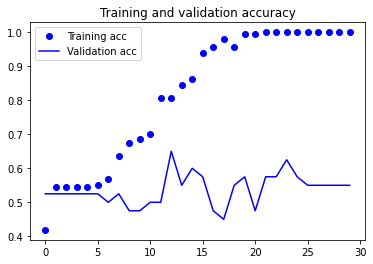

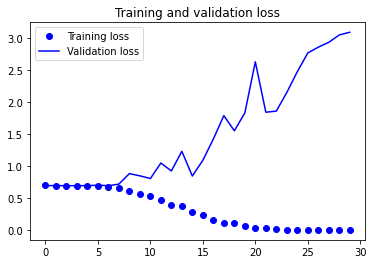

In [218]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




predicted class:  1



labels {'cats': 0, 'dogs': 1}


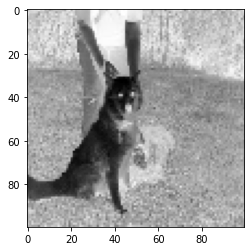

In [219]:
INDEX = 66
# INDEX = 36
# INDEX = 56
test_image = training_data[INDEX]

prediction = model.predict_classes([[test_image]])
predicted_class = prediction[0][0]
print('\n\n')
print('predicted class: ', predicted_class)
print('\n\n')
print('labels',train_generator.class_indices)

import matplotlib.pyplot as plt

plt.imshow(training_data[INDEX][:,:,0], cmap = plt.cm.binary)

In [ ]:
# Next Video: Leveraging a pre-trained network

-----------------------

# 06 - Fine-tuning a Pre-trained Model  (Part 4) 💻

## Leveraging a pre-trained network

In [220]:
from tensorflow.keras.applications import vgg16

In [221]:
vgg16_model = vgg16.VGG16(
    
    include_top=False, 
    weights='imagenet',
    input_shape=(100,100,3),
    classes=1
    
)

In [222]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

### Freeze weights

In [223]:

model = Sequential()

for layer in vgg16_model.layers:
    layer.trainable = False
    model.add(layer)

In [224]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [225]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)      

In [226]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [227]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        color_mode='rgb',
        target_size=(100, 100),
        batch_size=200,
        class_mode='binary')

training_data, training_labels = next(train_generator)

Found 400 images belonging to 2 classes.


In [228]:
history = model.fit(training_data, training_labels, validation_split=0.2, epochs=15)

Train on 160 samples, validate on 40 samples
Epoch 1/15
160/160 [==============================] - 17s 108ms/sample - loss: 1.9706 - acc: 0.4875 - val_loss: 1.9054 - val_acc: 0.2750
Epoch 2/15
160/160 [==============================] - 17s 108ms/sample - loss: 1.0930 - acc: 0.5625 - val_loss: 0.4328 - val_acc: 0.7500
Epoch 3/15
160/160 [==============================] - 17s 105ms/sample - loss: 0.6187 - acc: 0.6375 - val_loss: 0.4406 - val_acc: 0.7500
Epoch 4/15
160/160 [==============================] - 17s 107ms/sample - loss: 0.3739 - acc: 0.8375 - val_loss: 0.5952 - val_acc: 0.7000
Epoch 5/15
160/160 [==============================] - 16s 99ms/sample - loss: 0.3796 - acc: 0.8313 - val_loss: 0.4404 - val_acc: 0.8000
Epoch 6/15
160/160 [==============================] - 17s 104ms/sample - loss: 0.2664 - acc: 0.9187 - val_loss: 0.4368 - val_acc: 0.7750
Epoch 7/15
160/160 [==============================] - 16s 100ms/sample - loss: 0.2263 - acc: 0.9438 - val_loss: 0.4665 - val_acc: 0.80

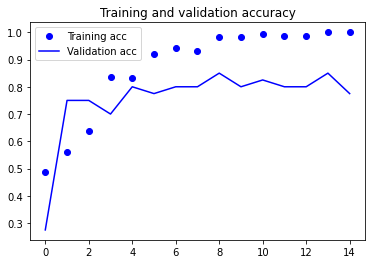

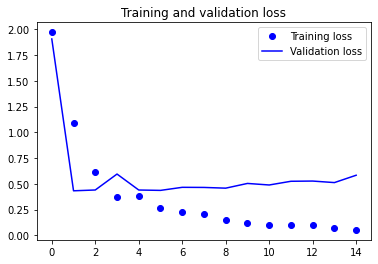

In [229]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Challenge: Achieve > 95% validation accuracy 👍

### Let's verify the results




predicted class:  1



labels {'cats': 0, 'dogs': 1}


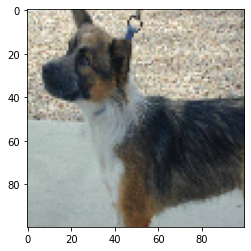

In [233]:
INDEX = 74
test_image = training_data[INDEX]

prediction = model.predict_classes([[test_image]])
predicted_class = prediction[0][0]
print('\n\n')
print('predicted class: ', predicted_class)
print('\n\n')
print('labels',train_generator.class_indices)

import matplotlib.pyplot as plt

plt.imshow(training_data[INDEX])